In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm.notebook import tqdm
import pandas as pd

from forsale import *

from Bots.GreedyBot import GreedyBot
from Bots.RandomBot import RandomBot
from Bots.CheapskateBot import CheapskateBot
from Bots.BigSpenderBot import BigSpenderBot
from Bots.SmartBot import SmartBot
from Bots.PrudentBot import PrudentBot
from Bots.AuctioneerBot import AuctioneerBot
from Bots.AnalyistBot import AnalystBot
from Bots.HistorianBot import HistorianBot

def run_multiple_games(n_games, bots):

    all_game_data = []

    for i in tqdm(range(n_games), desc='Simulating games'):
        n_players = random.randint(4, 6)
        bot_selections = random.choices(bots, k=n_players)

        player_setup = {}
        for bot in bot_selections:
            player_setup[bot] = player_setup.get(bot, 0) + 1

        winner, winnertype, final_scores, df = play_game(player_setup)
        df['GameNumber'] = i + 1
        df['winner'] = winnertype
        all_game_data.append(df)

    combined_df = pd.concat(all_game_data, ignore_index=True)
    return combined_df


c:\Users\devan\OneDrive\repostiories\forsalegame\game\Bots\HistorianBot.py:4: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  sourcedata = pd.read_csv(r'C:\Users\devan\OneDrive\repostiories\forsalegame\game\Bots\HistoricalData.csv')


In [ ]:
combined_df = run_multiple_games(20000, bots = [GreedyBot, HistorianBot, CheapskateBot, RandomBot, BigSpenderBot, SmartBot, PrudentBot, AuctioneerBot, AnalystBot])


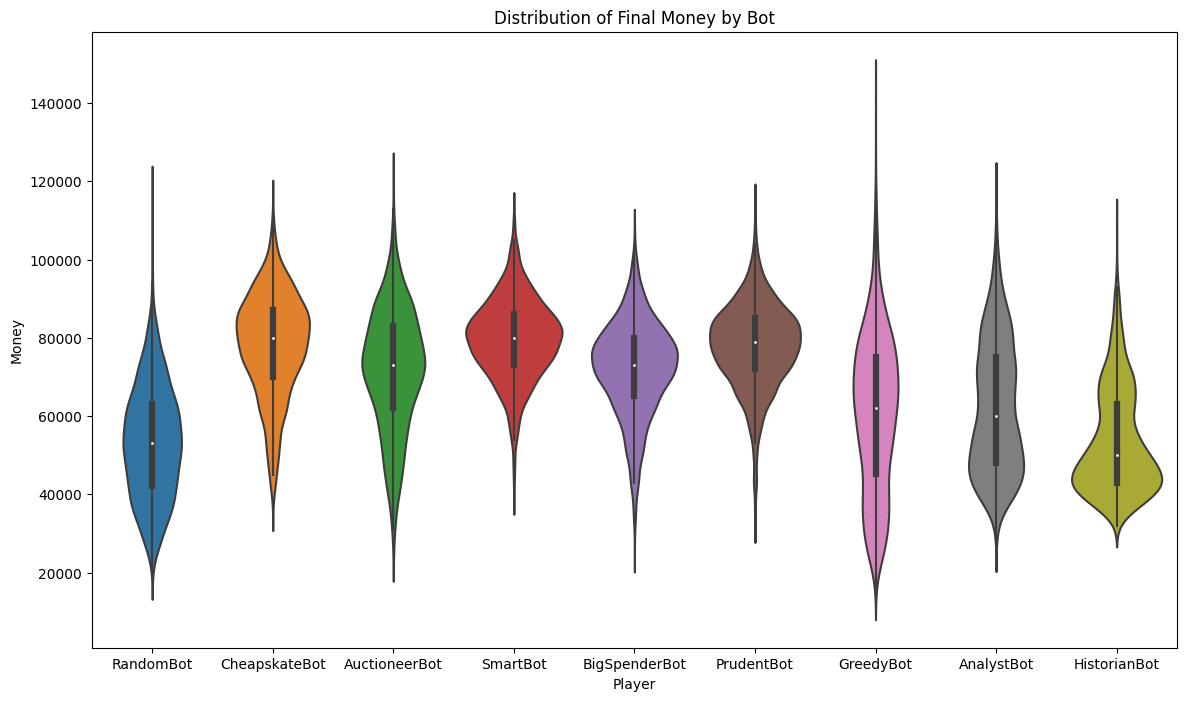

In [9]:

# combined_df = run_multiple_games(100, bots = [GreedyBot, HistorianBot, CheapskateBot])


# Create a unique combination of 'Player' and 'Index'
combined_df['PlayerIndex'] = combined_df['Player'] + combined_df['Player Index'].astype(str)

final_round = combined_df['Round'].max()
final_money = combined_df[combined_df['Round'] == final_round]

plt.figure(figsize=(14,8))
sns.violinplot(data=final_money, x='Player', y='Money')
plt.title('Distribution of Final Money by Bot')
plt.show()

combined_df.to_csv('Data.csv')
pass